In [37]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
from sklearn.model_selection import train_test_split
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

In [38]:
import pickle

In [40]:
cleaned_train_set = pd.read_csv("../data/processed/train_data.csv")

In [41]:
cleaned_train_set.shape

(413, 14)

In [42]:
cleaned_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       413 non-null    int64  
 1   Y       413 non-null    int64  
 2   month   413 non-null    object 
 3   day     413 non-null    object 
 4   FFMC    413 non-null    float64
 5   DMC     413 non-null    float64
 6   DC      413 non-null    float64
 7   ISI     413 non-null    float64
 8   temp    413 non-null    float64
 9   RH      413 non-null    int64  
 10  wind    413 non-null    float64
 11  rain    413 non-null    float64
 12  area    413 non-null    float64
 13  season  413 non-null    object 
dtypes: float64(8), int64(3), object(3)
memory usage: 45.3+ KB


In [43]:
cleaned_train_set.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,4.629540,4.237288,90.771429,109.854237,546.031235,8.971671,18.819613,44.353511,4.085714,0.026634,13.868329
std,2.278178,1.164551,4.655424,63.576254,251.835608,4.581362,5.789594,16.476107,1.813679,0.330882,69.842730
min,1.000000,2.000000,50.400000,2.400000,7.900000,0.400000,4.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,61.100000,433.300000,6.400000,15.400000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.700000,108.000000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,6.000000,5.000000,92.900000,141.300000,713.900000,10.700000,22.900000,53.000000,5.400000,0.000000,6.580000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,99.000000,9.400000,6.400000,1090.840000


In [44]:
cleaned_train_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season
0,2,5,jul,sun,93.9,169.7,411.8,12.3,23.4,40,6.3,0.0,0.0,summer
1,4,4,aug,sat,90.2,96.9,624.2,8.9,18.4,42,6.7,0.0,0.0,summer
2,4,4,aug,wed,95.1,141.3,605.8,17.7,20.6,58,1.3,0.0,0.0,summer
3,1,2,aug,sat,93.7,231.1,715.1,8.4,25.9,32,3.1,0.0,0.0,summer
4,4,5,aug,thu,89.4,266.2,803.3,5.6,17.4,54,3.1,0.0,0.0,summer


### Categorical columns

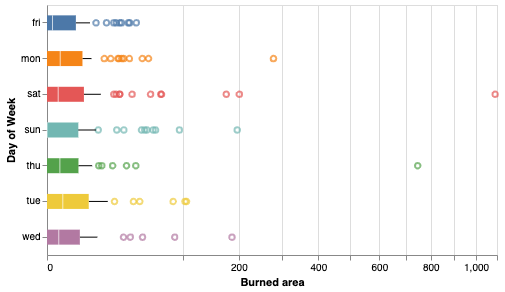

In [45]:
alt.Chart(cleaned_train_set).mark_boxplot(size = 15).encode(
    x = alt.X("area", 
              scale = alt.Scale(type = "sqrt"),
              title = "Burned area"),
    y = alt.Y("day", 
              sort = "x",
              title = "Day of Week"),
    color = alt.Color("day",
                      legend = None)
).properties(
    height = 250,
    width = 450
)

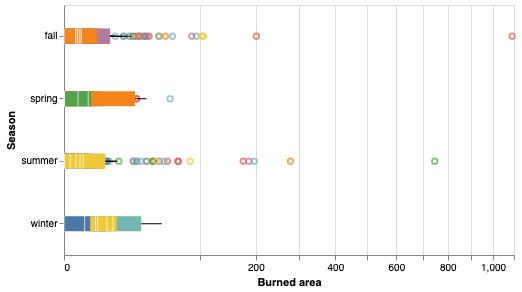

In [46]:
# Change month to season

alt.Chart(cleaned_train_set).mark_boxplot(size = 15).encode(
    x = alt.X("area", 
              scale = alt.Scale(type = "sqrt"),
              title = "Burned area"),
    y = alt.Y("season", 
              sort = "x",
              title = "Season"),
    color = alt.Color("day",
                      legend = None)
).properties(
    height = 250,
    width = 450
)

### Numerical columns

In [47]:
categorical_cols = ['X', 'Y']
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']

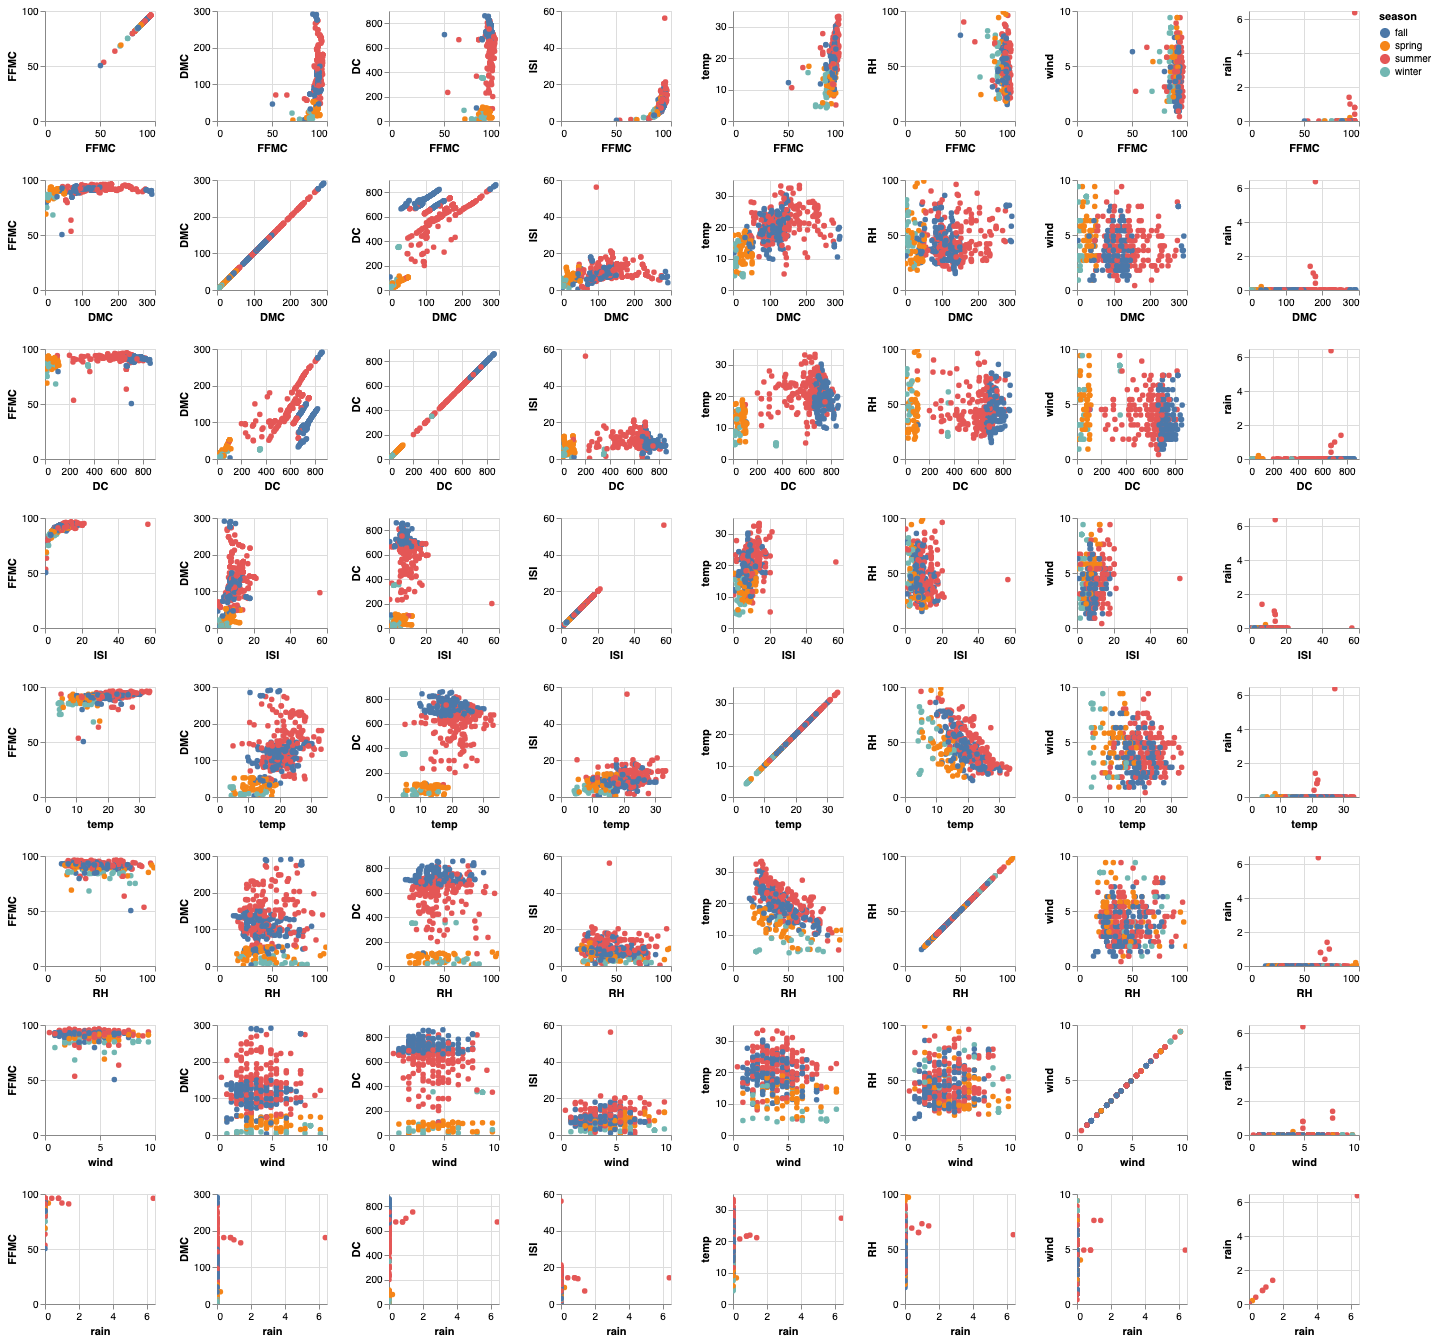

In [48]:
alt.Chart(cleaned_train_set).mark_circle().encode(
    x = alt.X(alt.repeat("row"), type = "quantitative"),
    y = alt.Y(alt.repeat("column"), type = "quantitative"),
    color = "season"
).properties(
    width = 110,
    height = 110
).repeat(
    column = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain"],
    row = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain"]
).configure_mark(
    opacity = 1
).interactive()

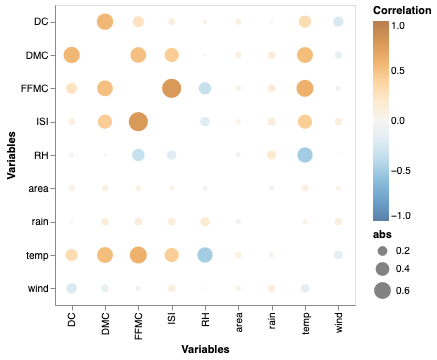

In [49]:
train_df_numeric = cleaned_train_set.drop(["X", "Y", "month", "day"], axis=1)

corr_df = train_df_numeric.corr("spearman").stack().reset_index(name="corr")
corr_df.loc[corr_df["corr"] == 1, "corr"] = 0
corr_df["abs"] = corr_df["corr"].abs()

(
    alt.Chart(corr_df)
    .mark_circle()
    .encode(x = alt.X("level_0", title = "Variables"),
            y = alt.Y("level_1", title = "Variables"),
            size = "abs",
            color = alt.Color('corr',
                               scale = alt.Scale(scheme = 'blueorange',
                                                 domain = (-1, 1)),
                               title = "Correlation"))
).properties(
    width = 300,
    height = 300
)

In [60]:
set(cleaned_train_set.columns)

{'DC',
 'DMC',
 'FFMC',
 'ISI',
 'RH',
 'X',
 'Y',
 'area',
 'day',
 'month',
 'rain',
 'season',
 'temp',
 'wind'}

In [69]:
assert {'DC','DMC','FFMC','ISI','RH','X','Y','area','day','month','rain','season',
 'temp',
 'wind'} == set(cleaned_train_set.columns), "error"